In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [154]:
data = pd.read_csv('./BSACTData.csv', index_col='Timestamp')
data = data.dropna()

In [138]:
data = pd.read_csv('./BSACTDataII.csv', index_col='Timestamp')
data = data.loc[:data.index[4999], :]

In [155]:
data['block-gen-time'] = 560
data['tx-gen-time'] = 26.66

In [156]:
data.head()

,mempool-size,transactions-per-second,median-confirmation-time,transaction-fees,n-transactions-per-block,block-gen-time,tx-gen-time
Timestamp,,,,,,,
15-06-2016 00:00,21228973.0,2.433333,14.13,83.386147,1705.276316,560,26.66
16-06-2016 00:00,25873598.0,1.550000,9.66,82.296660,1797.785235,560,26.66
17-06-2016 00:00,26867610.0,2.350000,9.30,78.902095,1703.033557,560,26.66
18-06-2016 00:00,25255652.5,2.150000,7.75,70.578306,1489.348101,560,26.66
19-06-2016 00:00,7502073.5,2.250000,6.00,63.143491,1233.322034,560,26.66


In [157]:
data.shape

(1414, 7)

In [158]:
X = data.drop(columns=['median-confirmation-time', 'transaction-fees', 'n-transactions-per-block'])
# Y = data.loc[:, ['median-confirmation-time', 'transaction-fees', 'n-transactions-per-block']]
Y = data.loc[:, ['median-confirmation-time']]

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [160]:
X_train.head()

,mempool-size,transactions-per-second,block-gen-time,tx-gen-time
Timestamp,,,,
08-03-2018 00:00,21909306.5,2.233333,560,26.66
23-07-2018 00:00,157956.5,1.483333,560,26.66
14-10-2017 00:00,41604137.5,2.566667,560,26.66
02-08-2016 00:00,3247602.5,2.150000,560,26.66
17-11-2016 00:00,5396091.0,2.416667,560,26.66


In [161]:
model = Sequential()
model.add(Dense(50, input_dim=4, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(100, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# model.add(Dense(500, kernel_initializer='normal'))
# model.add(LeakyReLU())
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Dense(30, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, kernel_initializer='normal'))
model.add(LeakyReLU())
# model.add(BatchNormalization())
model.compile(loss='mean_squared_error', optimizer='adam')

In [162]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 50)                250       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 50)                200       
_________________________________________________________________
dense_28 (Dense)             (None, 100)               5100      
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 100)               400       
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
__________

In [163]:
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X_train, Y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor]);
# model.fit(X_train, Y_train, validation_split=0.2, epochs=30);

Train on 904 samples, validate on 227 samples
Epoch 1/30
904/904 [==============================] - 2s 2ms/step - loss: 110.0237 - val_loss: 95.3795
Epoch 2/30
904/904 [==============================] - 0s 206us/step - loss: 105.8125 - val_loss: 94.2415
Epoch 3/30
904/904 [==============================] - 0s 209us/step - loss: 101.7685 - val_loss: 91.8448
Epoch 4/30
904/904 [==============================] - 0s 210us/step - loss: 97.5435 - val_loss: 83.3050
Epoch 5/30
904/904 [==============================] - 0s 208us/step - loss: 92.7124 - val_loss: 88.8624
Epoch 6/30
904/904 [==============================] - 0s 215us/step - loss: 85.5769 - val_loss: 83.9899
Epoch 7/30
904/904 [==============================] - 0s 207us/step - loss: 78.1240 - val_loss: 72.0148
Epoch 8/30
904/904 [==============================] - 0s 216us/step - loss: 72.4624 - val_loss: 55.2289
Epoch 9/30
904/904 [==============================] - 0s 214us/step - loss: 65.1321 - val_loss: 58.9939
Epoch 10/30
904/9

## Train Data

In [164]:
Y_pred = model.predict(X_train)

In [165]:
np.linalg.norm(np.array(Y_pred - Y_train))/np.linalg.norm(np.array(Y_train))

0.40596417179971844

In [166]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

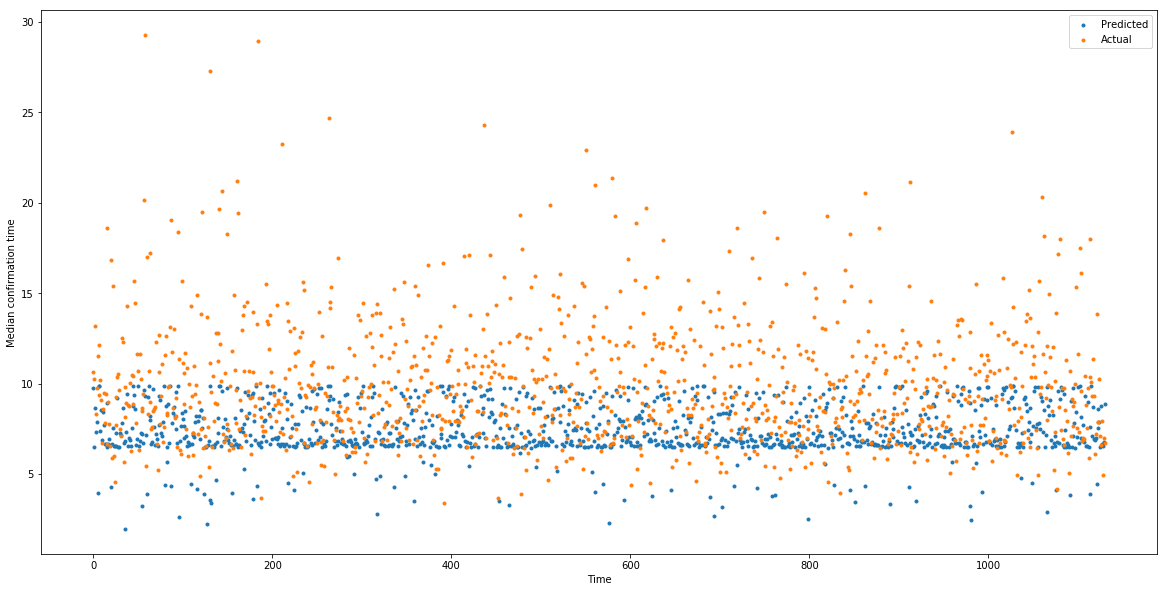

In [167]:
X = np.arange(len(Y_pred))
plt.scatter(X, Y_pred, label='Predicted', marker='.')
plt.scatter(X, Y_train, label='Actual', marker='.')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Median confirmation time')
plt.show()

In [176]:
Y_pred = model.predict(X_train)
yp = [Y_pred[i] for i in range(len(Y_pred)) if i%20 == 1]
yt = [Y_train.values[i] for i in range(len(Y_train)) if i%20 == 1]
xx = np.arange(len(yp))

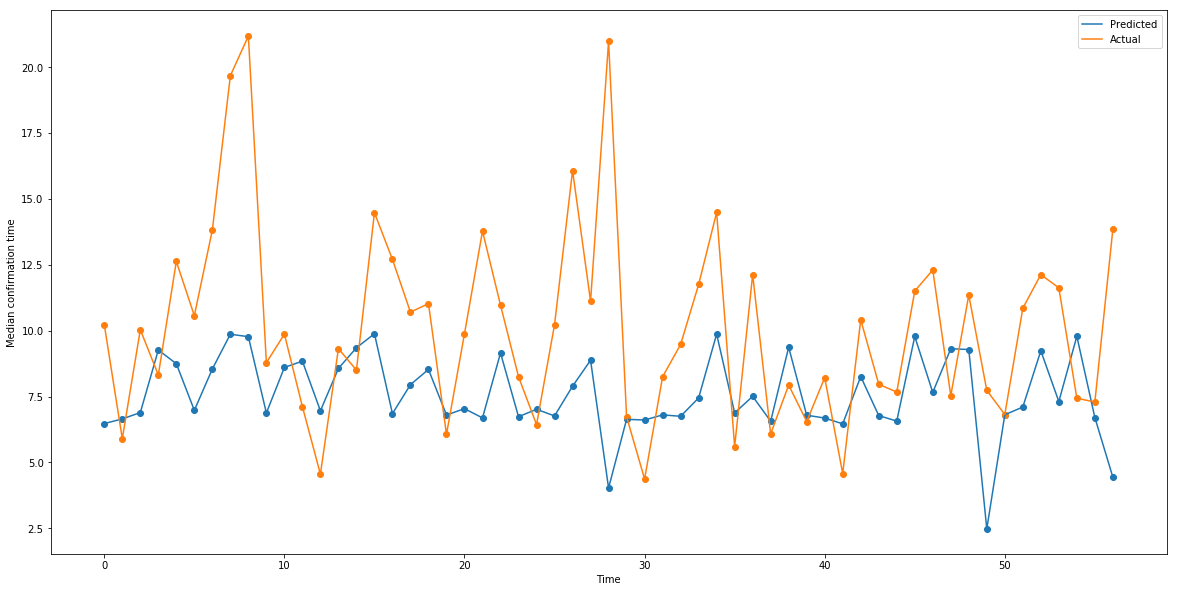

In [177]:
plt.scatter(xx, yp)
plt.scatter(xx, yt)
plt.plot(xx, yp, label='Predicted')
plt.plot(xx, yt, label='Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Median confirmation time')
plt.show()

## Test data

In [170]:
Y_pred = model.predict(X_test)

In [171]:
np.linalg.norm(np.array(Y_pred - Y_test))/np.linalg.norm(np.array(Y_test))

0.41930774565270507

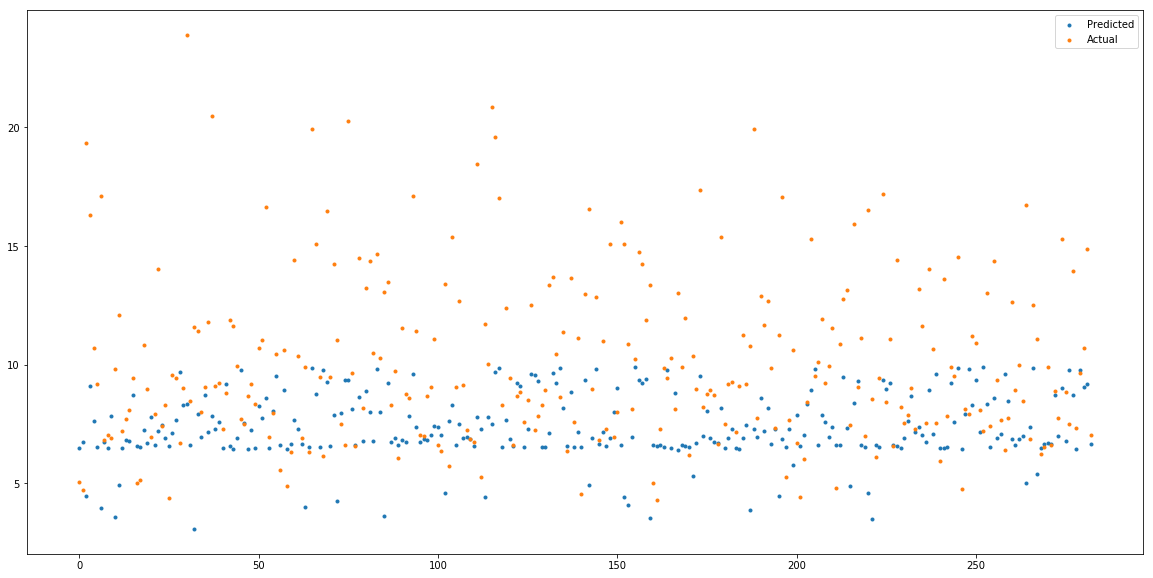

In [172]:
X = np.arange(len(Y_pred))
plt.scatter(X, Y_pred, label='Predicted', marker='.')
plt.scatter(X, Y_test, label='Actual', marker='.')
plt.legend()
plt.show()

In [173]:
# model.save('weights/weights.hfpy')

## TODOs
- handle -ve median conf times
- model gives -ve values more
- L2 regularization
- use prev y values to develop a time series model
- explore genetic algorithms

In [74]:
from keras.models import load_model

In [75]:
model = load_model('weights/weights.hfpy')

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                250       
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_68 (Dense)             (None, 100)               5100      
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
__________